<a href="https://colab.research.google.com/github/vagdevi17/creditcard/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Function to download the data from Google Drive
def download_data(file_id, file_name):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_name, quiet=False)

# Download the datasets
download_data('1cP4cPx64sTEkIwZdAUpDh2-EmfIyW_cQ', 'train_data.csv')
download_data('13Ycyd2YH7hGXrFV5LSrvU6HY7gT_LHi_', 'test_data.csv')

# Load the datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Downloading...
From: https://drive.google.com/uc?id=1cP4cPx64sTEkIwZdAUpDh2-EmfIyW_cQ
To: /content/train_data.csv
100%|██████████| 3.84M/3.84M [00:00<00:00, 200MB/s]
Downloading...
From: https://drive.google.com/uc?id=13Ycyd2YH7hGXrFV5LSrvU6HY7gT_LHi_
To: /content/test_data.csv
100%|██████████| 960k/960k [00:00<00:00, 75.1MB/s]


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email       

In [ ]:
# Summary statistics for the training data
print("\nSummary Statistics:")
print(train_data.describe(include='all'))


Summary Statistics:
                  ID Gender Has a car Has a property  Children count  \
count   2.916500e+04  29165     29165          29165    29165.000000   
unique           NaN      2         2              2             NaN   
top              NaN      F         N              Y             NaN   
freq             NaN  19549     18128          19557             NaN   
mean    5.078232e+06    NaN       NaN            NaN        0.430790   
std     4.182400e+04    NaN       NaN            NaN        0.741882   
min     5.008804e+06    NaN       NaN            NaN        0.000000   
25%     5.042047e+06    NaN       NaN            NaN        0.000000   
50%     5.074666e+06    NaN       NaN            NaN        0.000000   
75%     5.114629e+06    NaN       NaN            NaN        1.000000   
max     5.150485e+06    NaN       NaN            NaN       19.000000   

              Income Employment status                Education level  \
count   2.916500e+04             29165   

In [ ]:
# Convert appropriate columns to numeric
for col in train_data.columns:
    try:
        train_data[col] = pd.to_numeric(train_data[col])
    except ValueError:
        pass  # Ignore errors for non-numeric columns

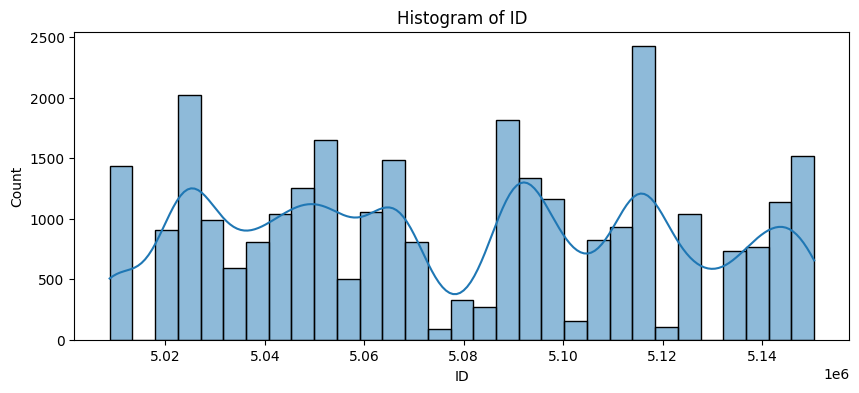

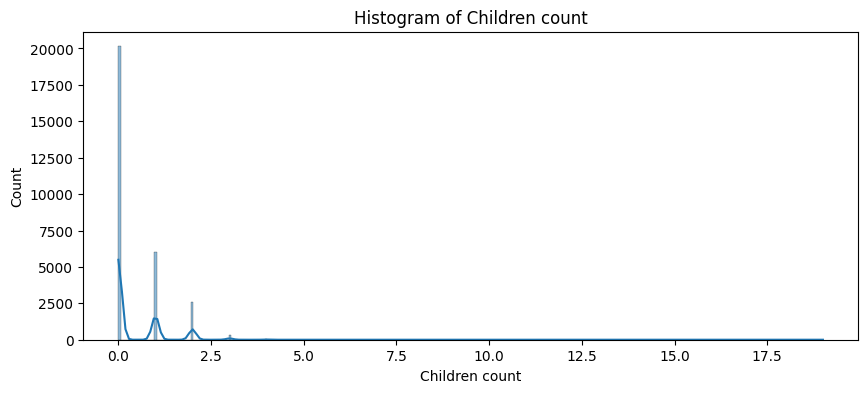

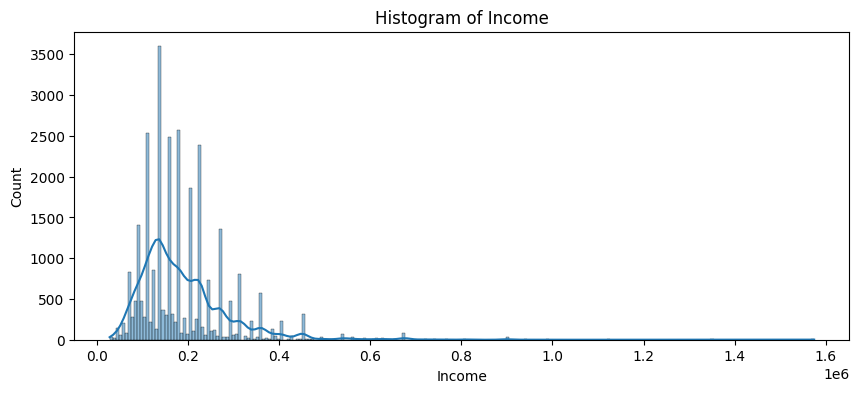

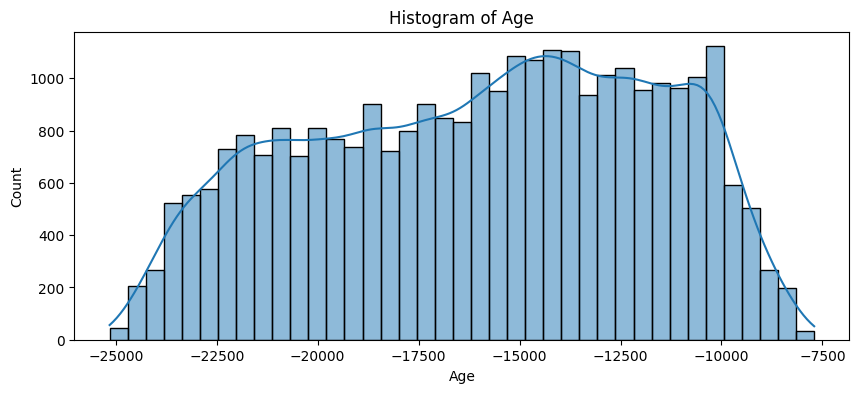

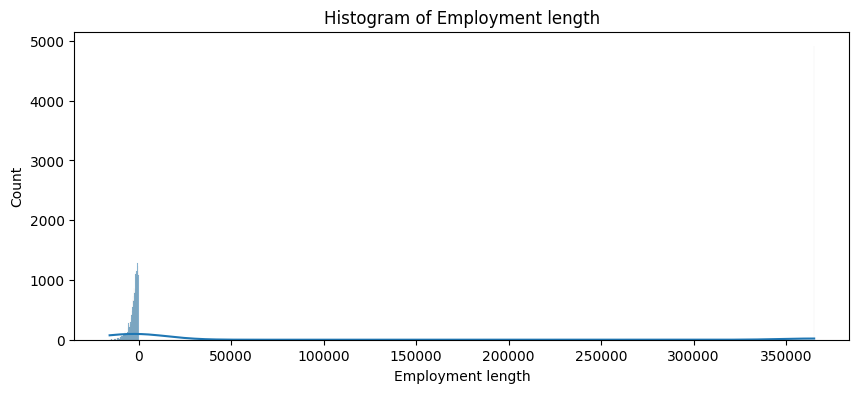

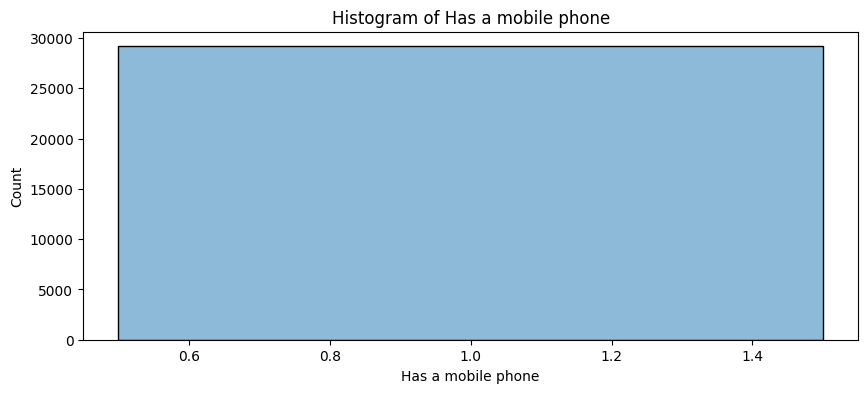

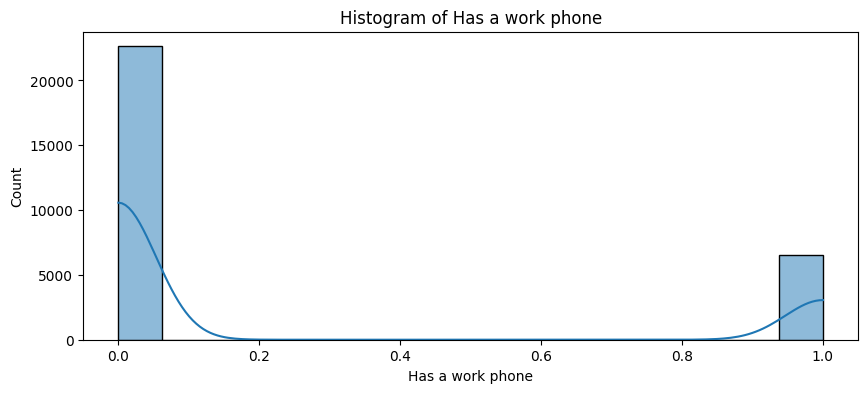

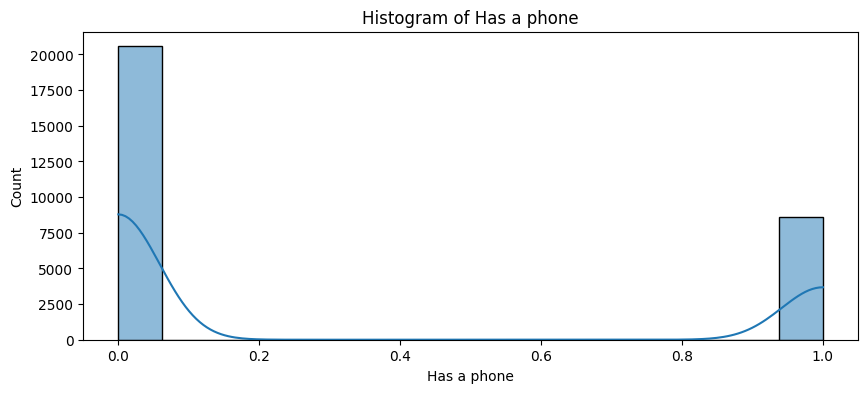

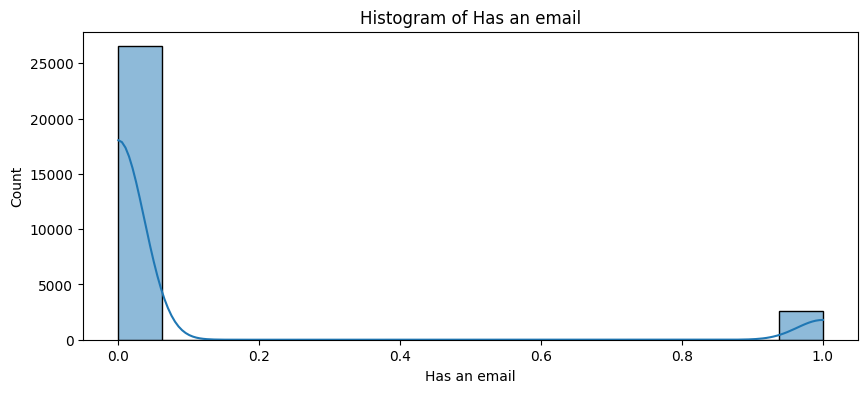

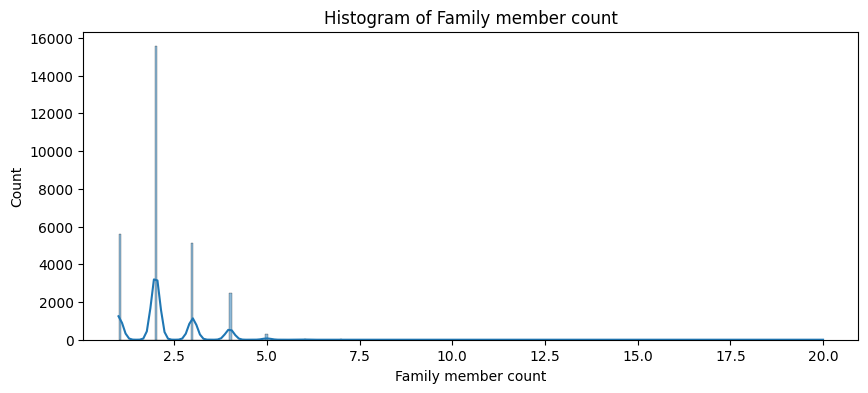

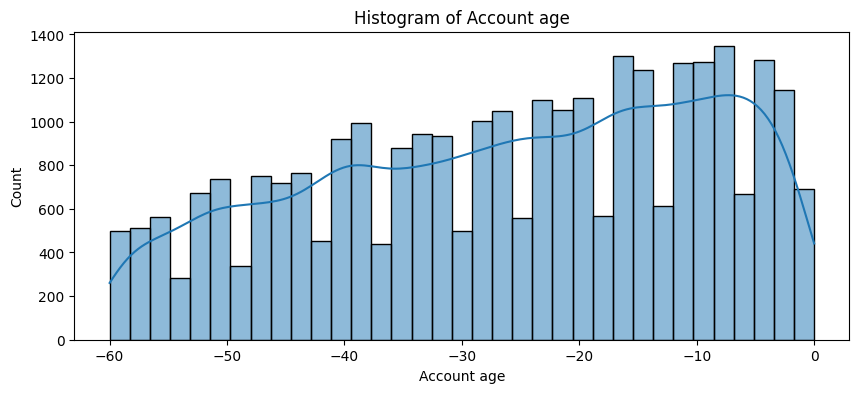

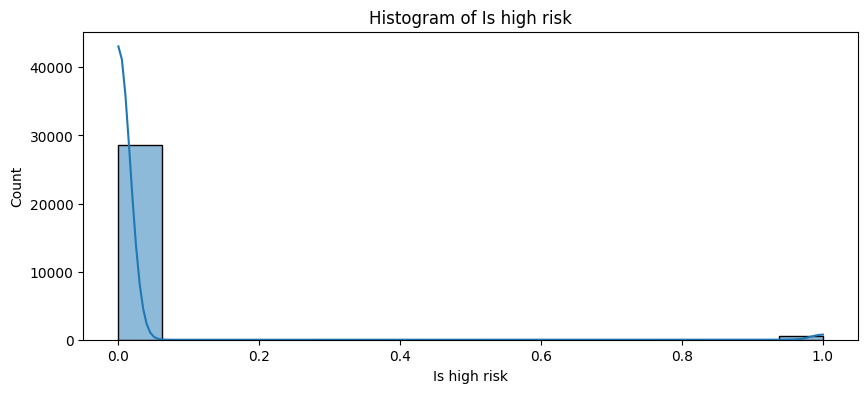

In [ ]:
# Univariate Analysis
# Numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

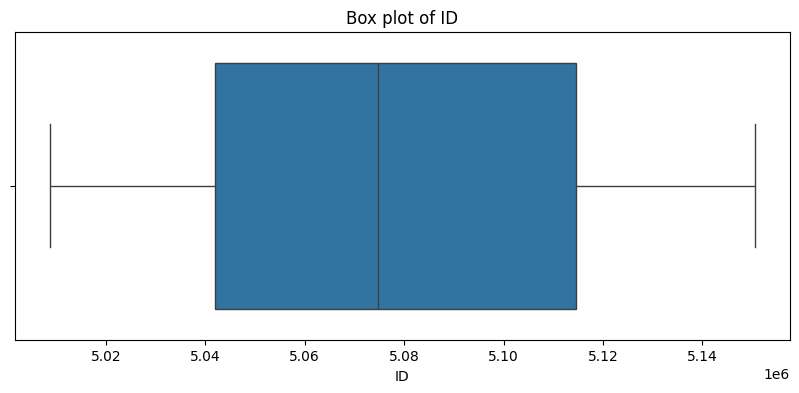

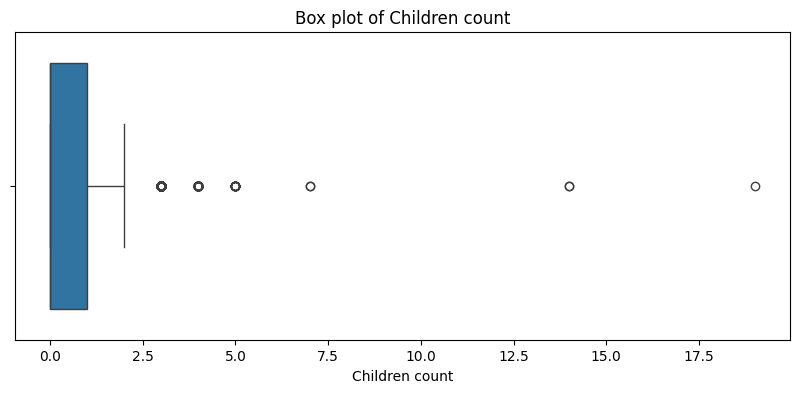

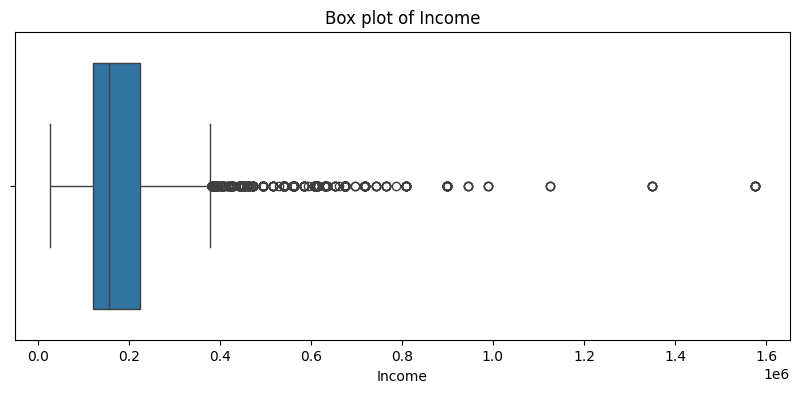

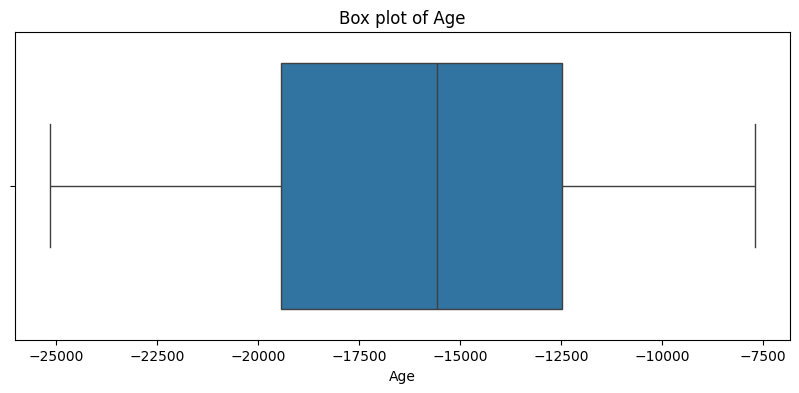

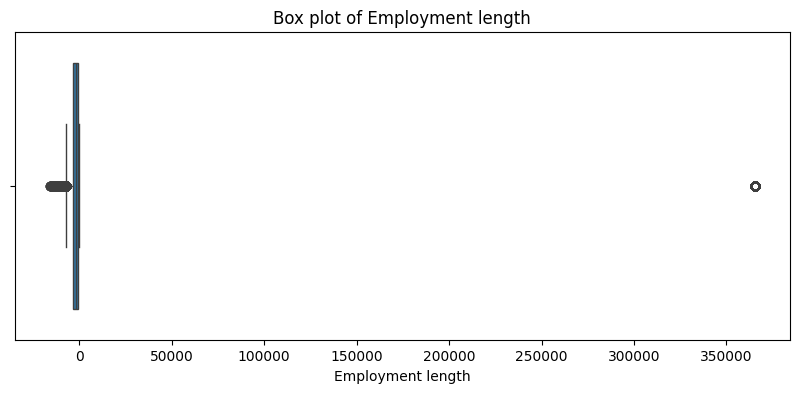

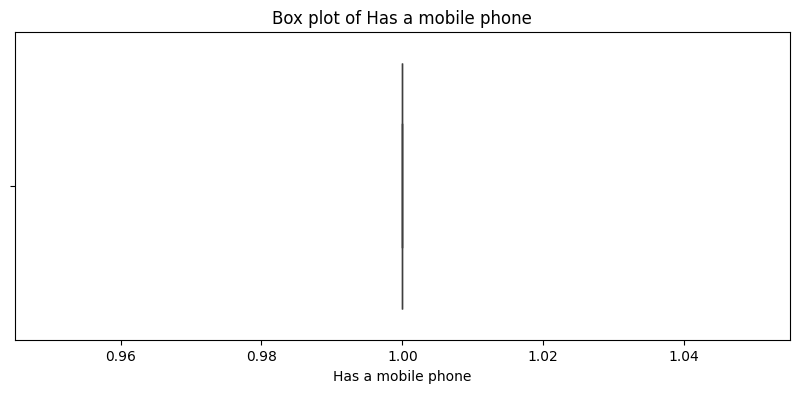

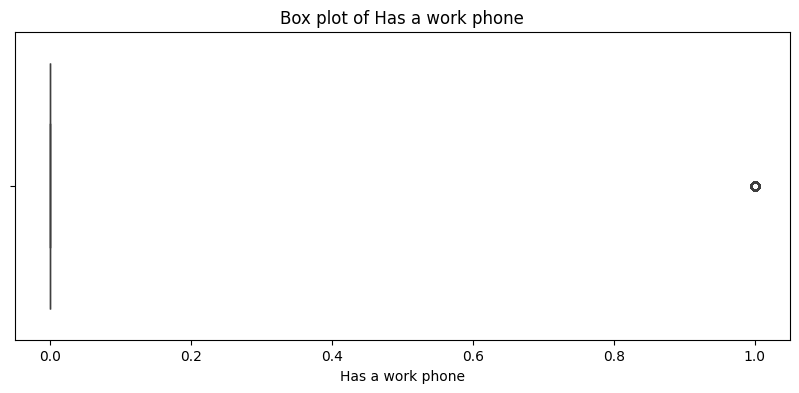

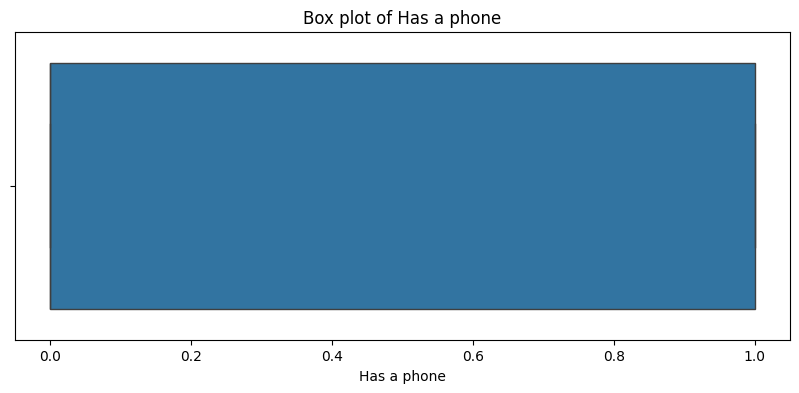

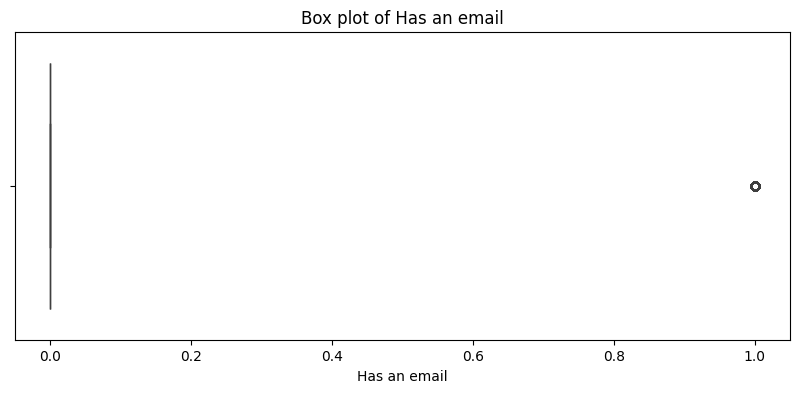

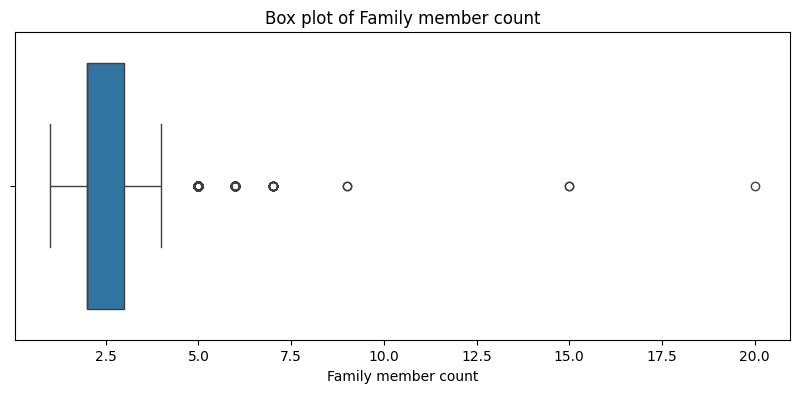

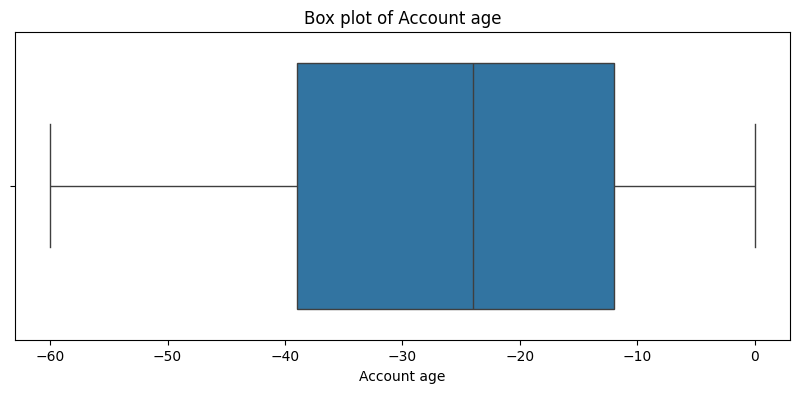

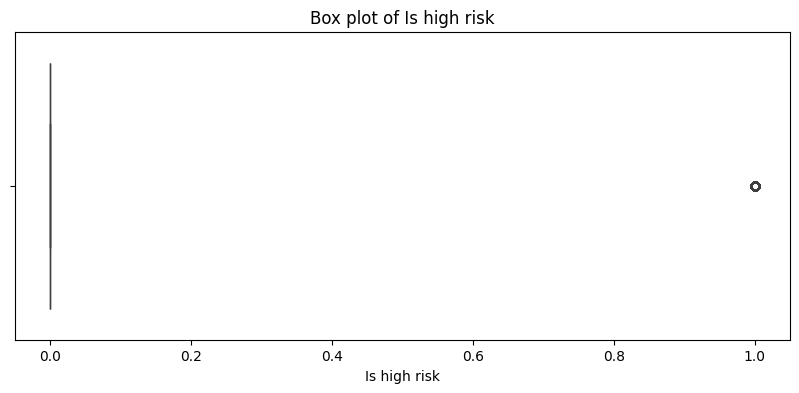

In [ ]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

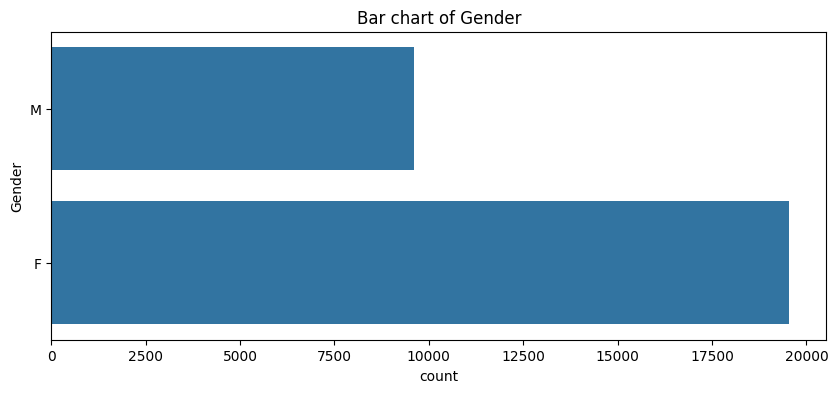

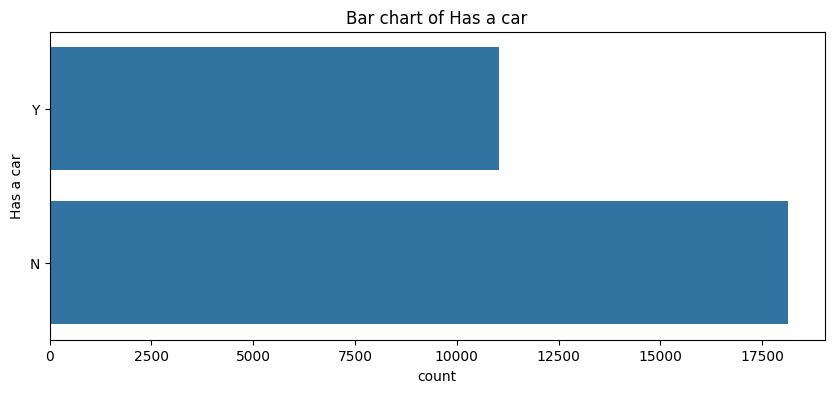

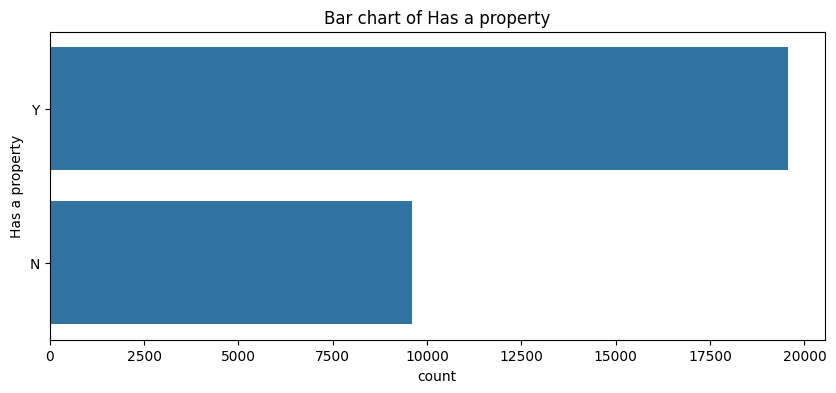

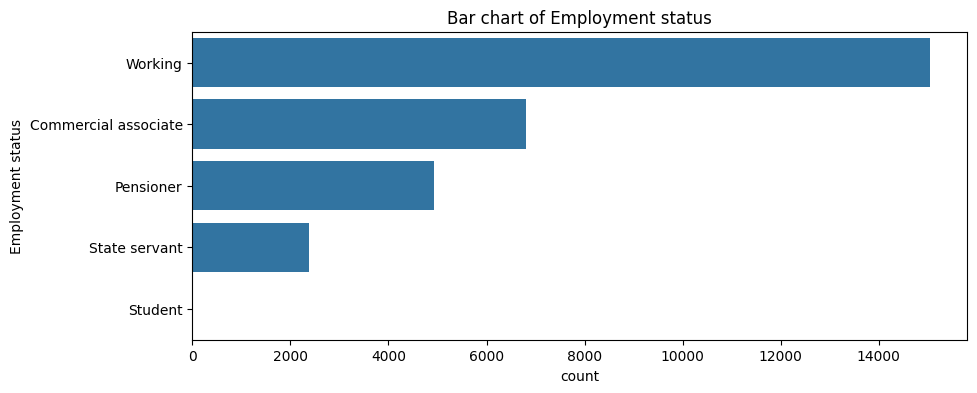

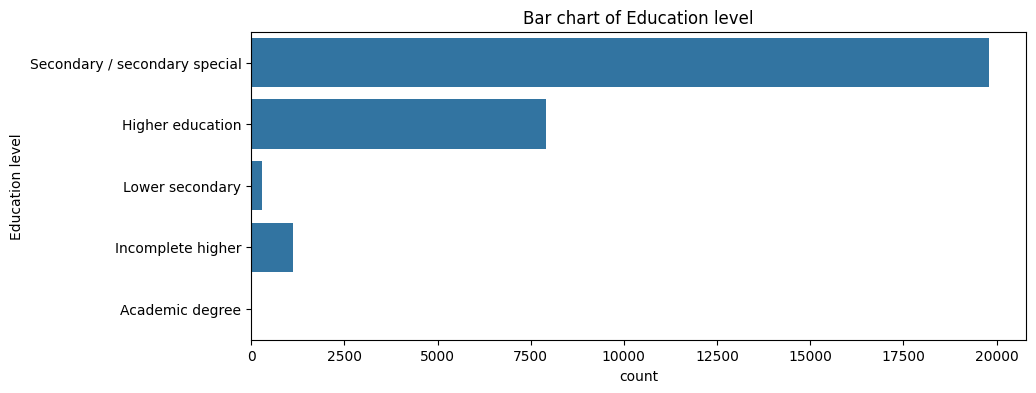

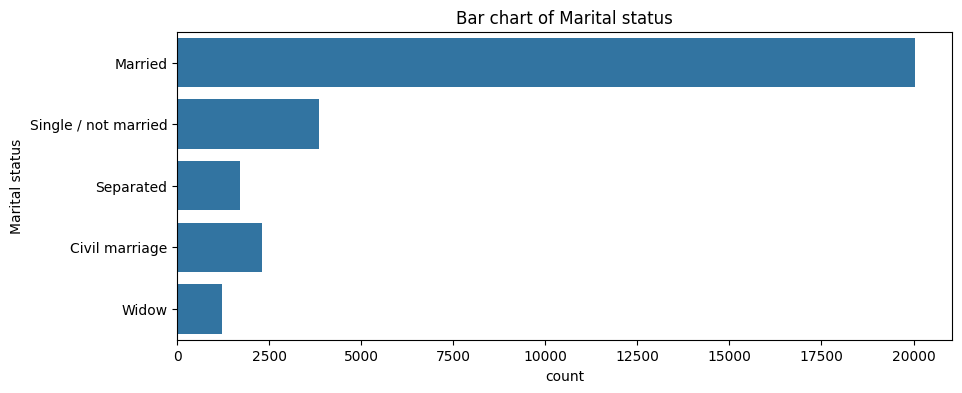

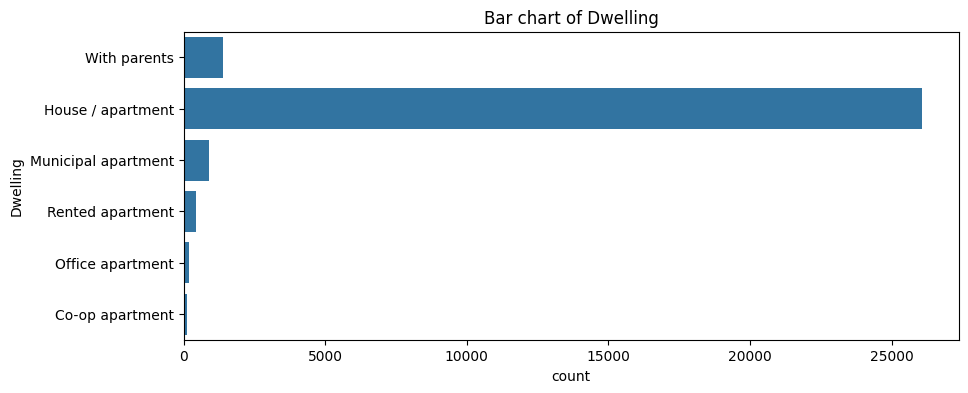

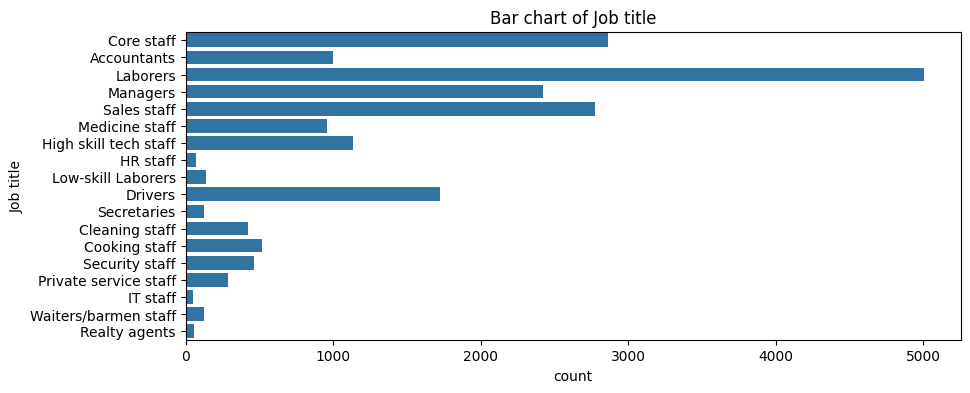

In [ ]:
# Categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

# Bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=train_data[feature].dropna())
    plt.title(f'Bar chart of {feature}')
    plt.show()

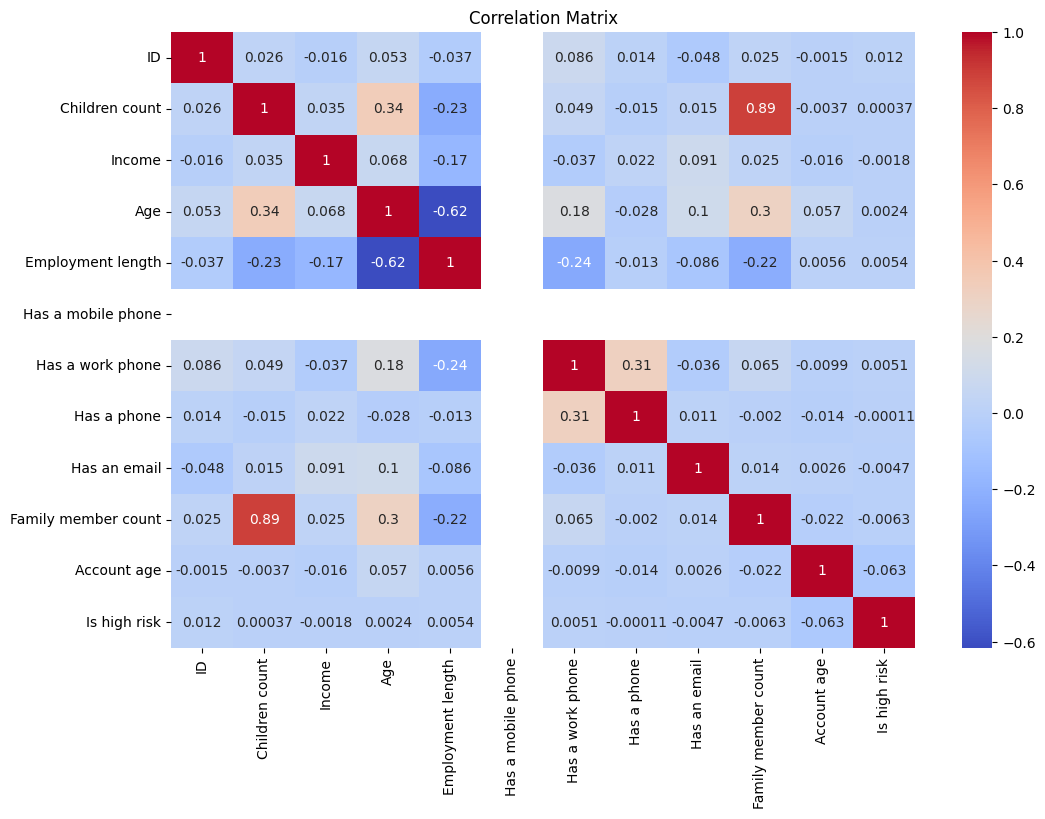

In [ ]:
# Bivariate Analysis
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = train_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


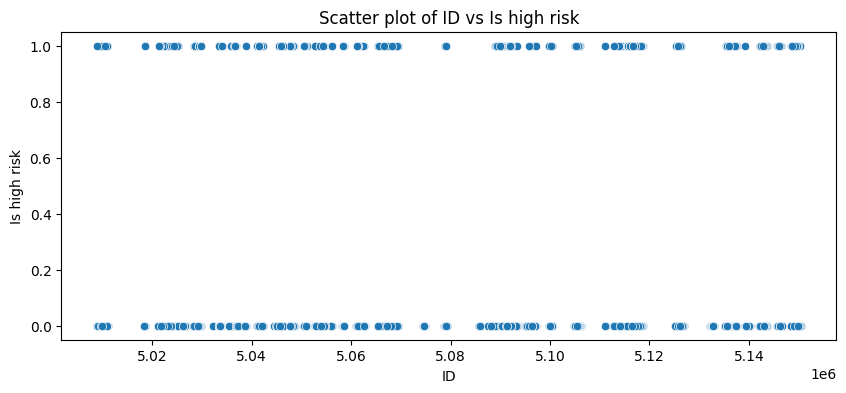

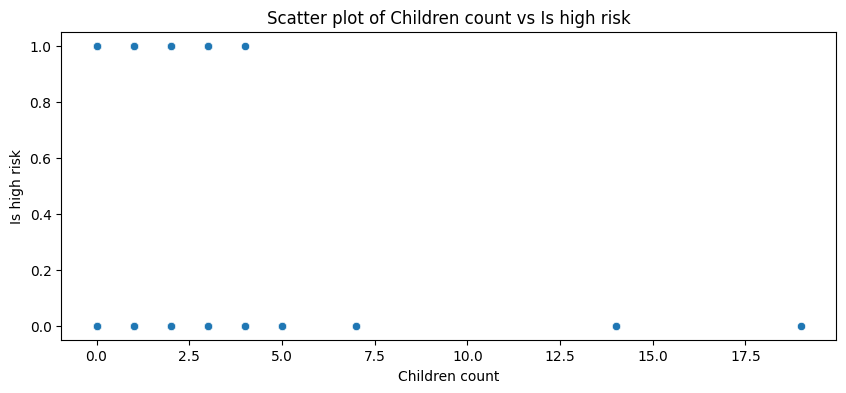

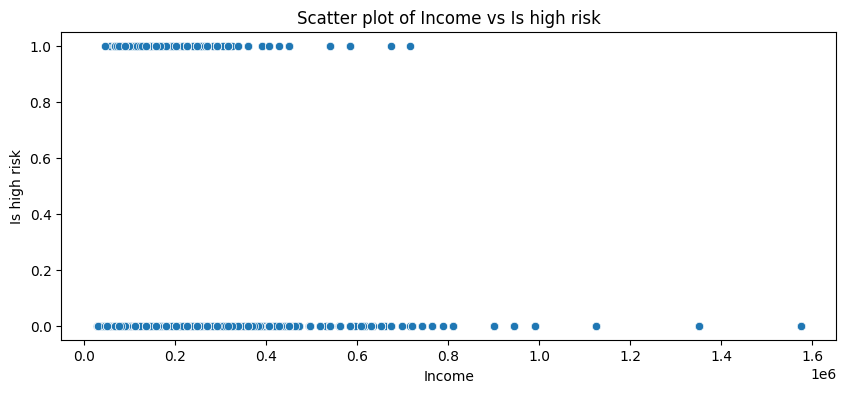

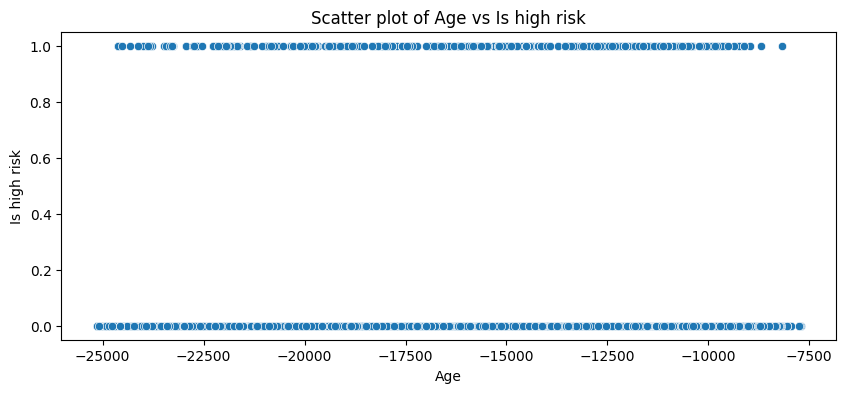

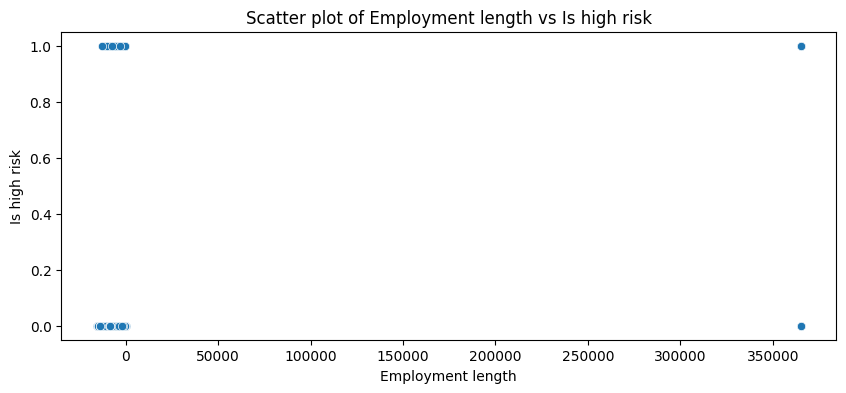

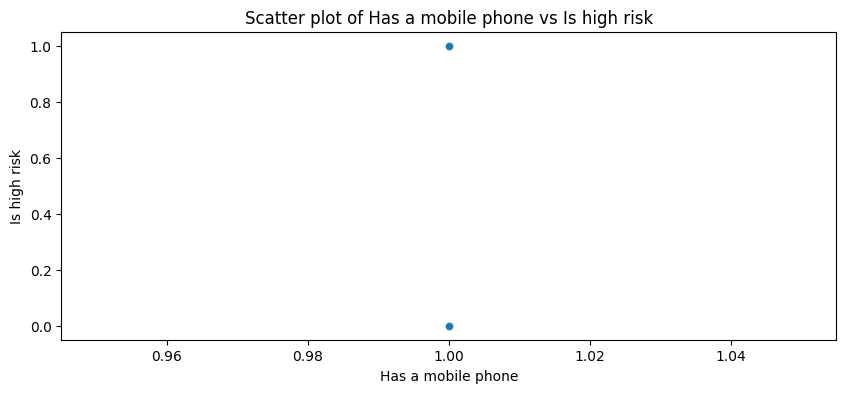

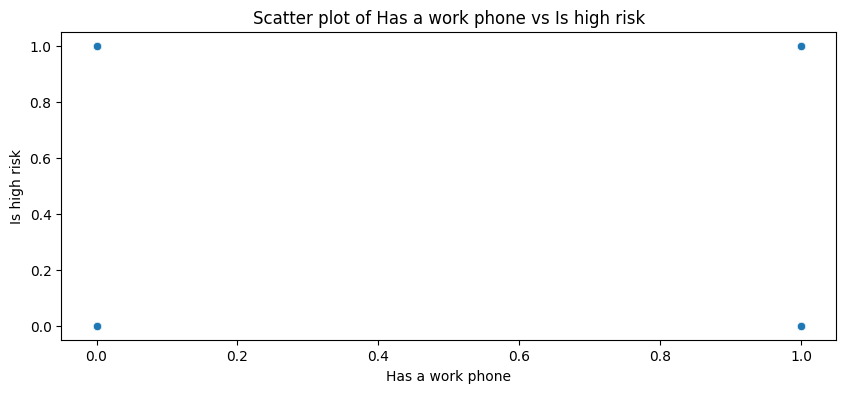

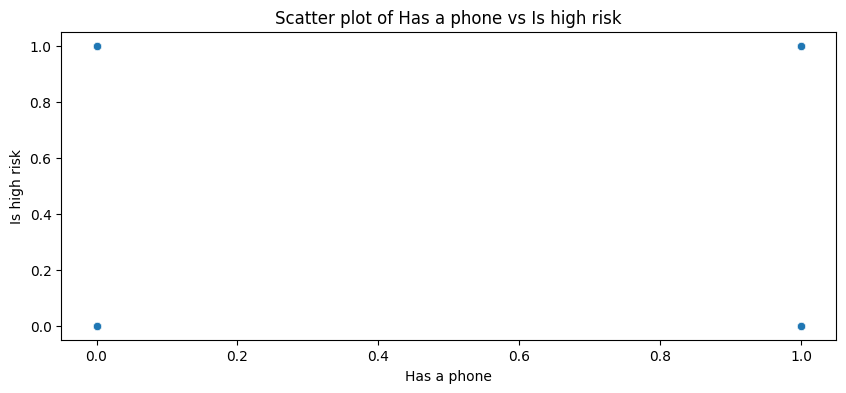

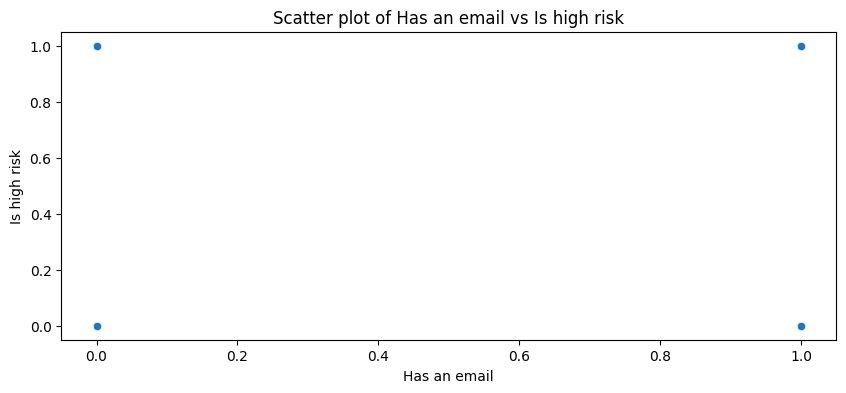

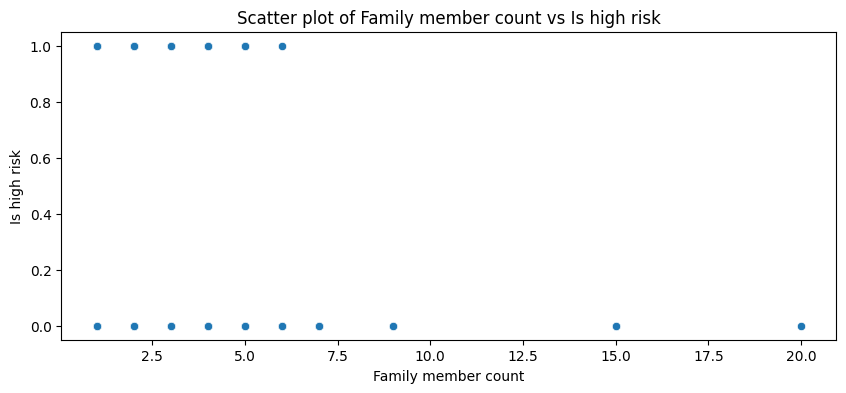

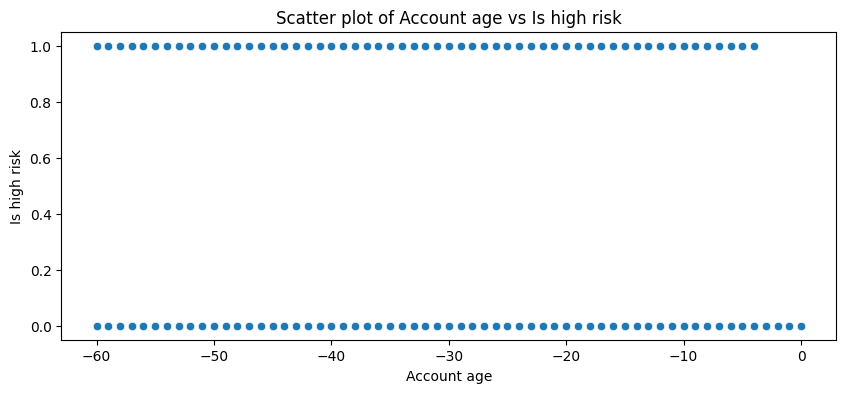

In [ ]:
# Scatter plots for numerical features against the target variable
target_variable = 'Is high risk'  # Assuming this is the target variable

for feature in numerical_features:
    if feature != target_variable:
        plt.figure(figsize=(10, 4))
        sns.scatterplot(x=train_data[feature], y=train_data[target_variable])
        plt.title(f'Scatter plot of {feature} vs {target_variable}')
        plt.show()

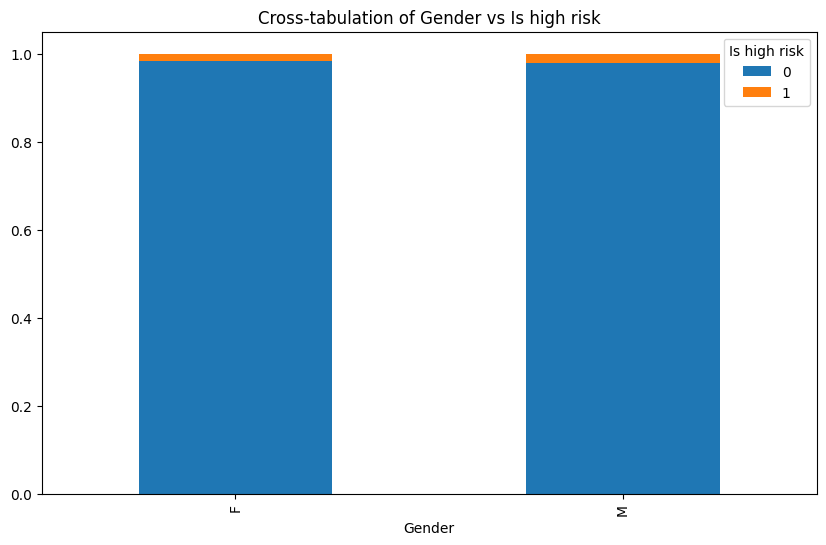

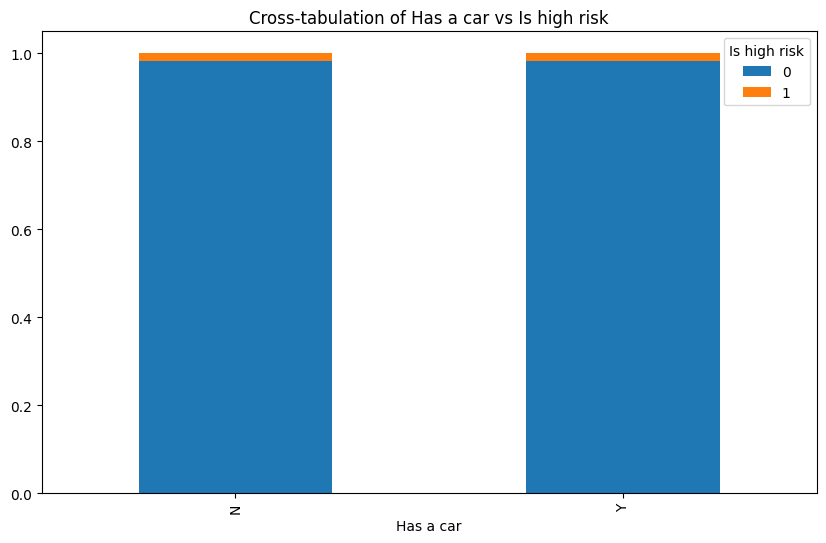

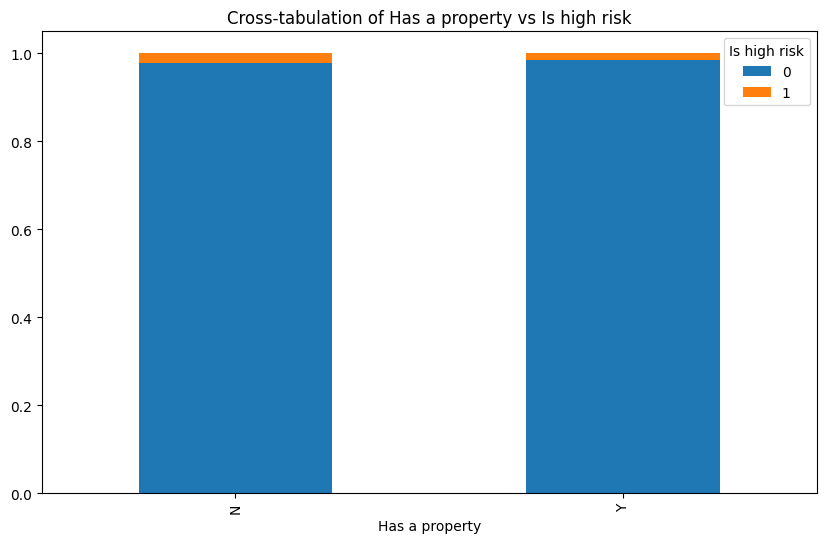

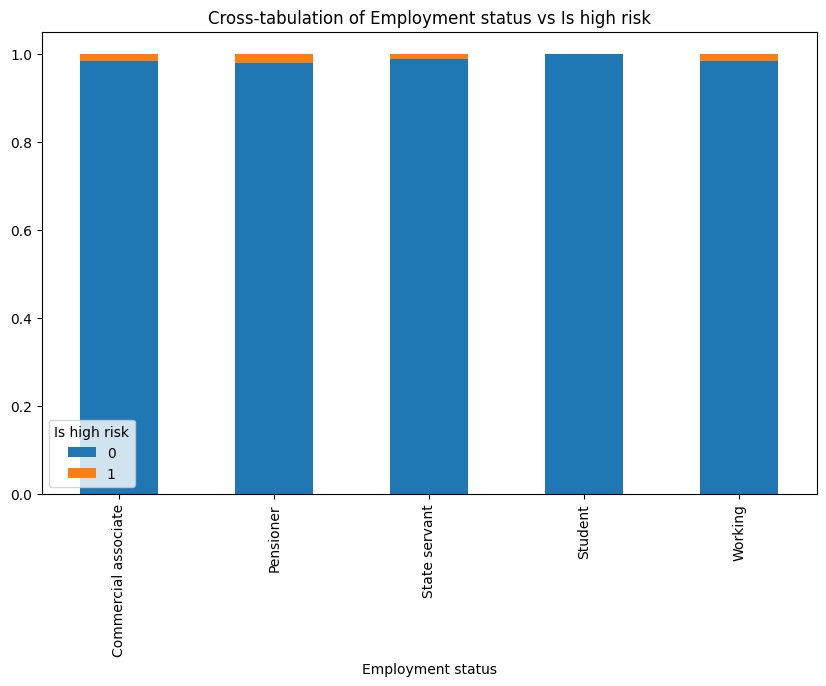

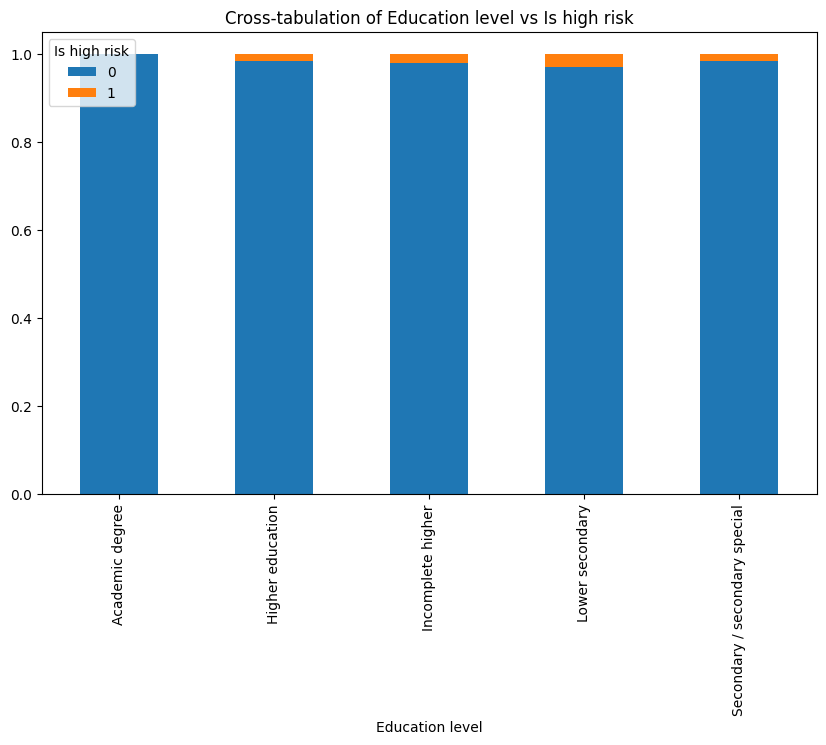

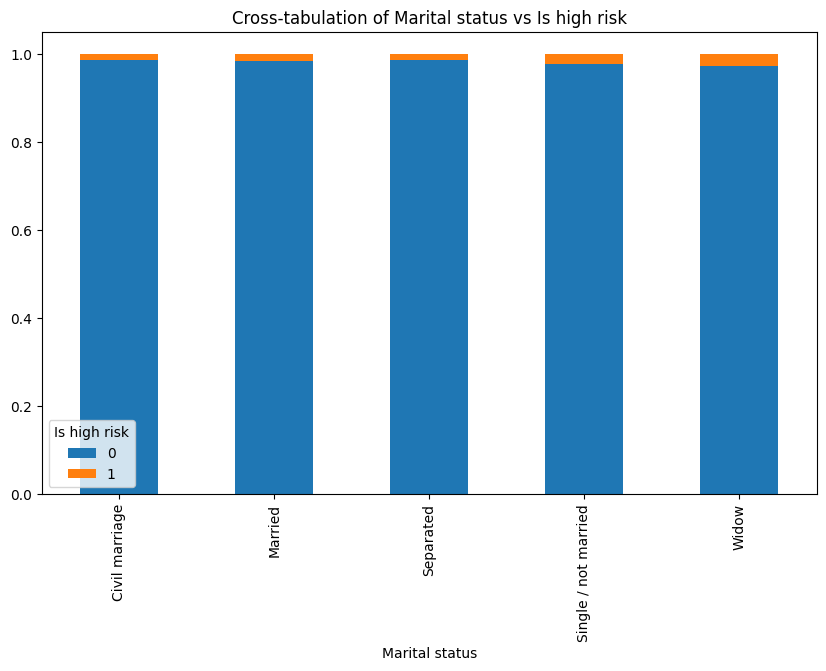

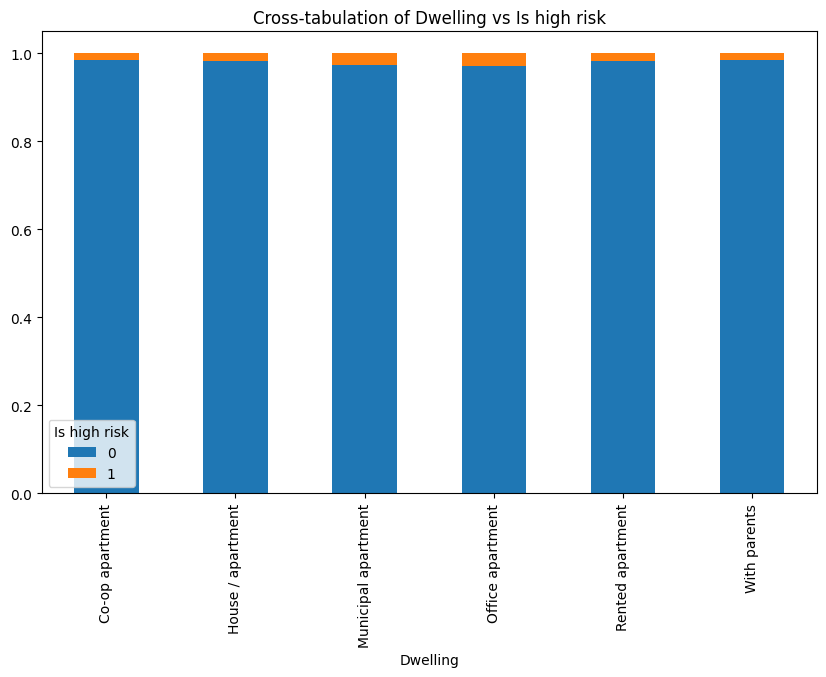

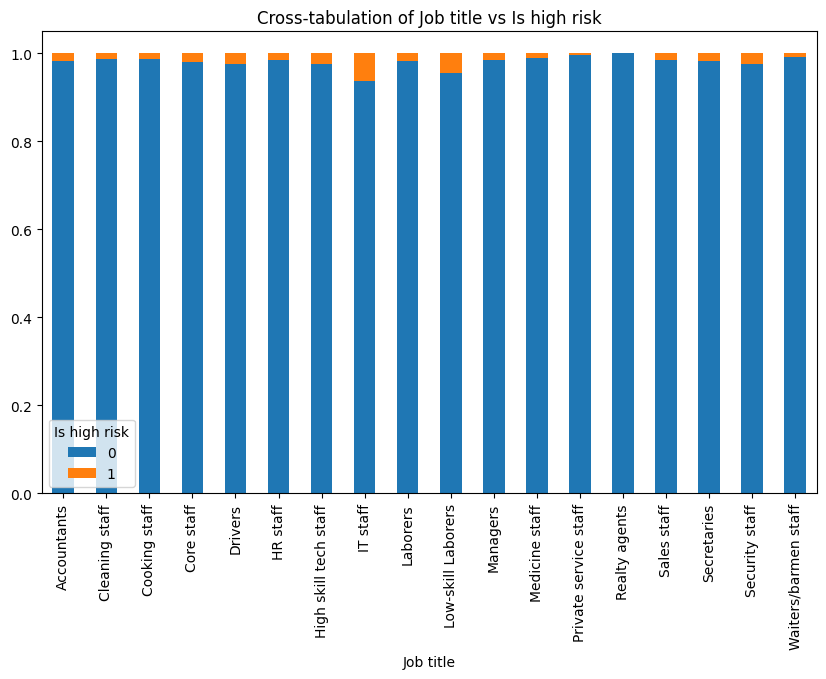

In [ ]:
# Cross-tabulations for categorical features against the target variable
for feature in categorical_features:
    crosstab = pd.crosstab(train_data[feature], train_data[target_variable], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Cross-tabulation of {feature} vs {target_variable}')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

# Handling missing values and encoding categorical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training and test data
train_data_preprocessed = preprocessor.fit_transform(train_data)
test_data_preprocessed = preprocessor.transform(test_data)

# Convert the preprocessed data back to DataFrame
train_data_preprocessed_df = pd.DataFrame(train_data_preprocessed, columns=numerical_features.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))
test_data_preprocessed_df = pd.DataFrame(test_data_preprocessed, columns=numerical_features.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

# Create new features (example)
# Interaction terms
train_data_preprocessed_df['Income*Age'] = train_data_preprocessed_df['Income'] * train_data_preprocessed_df['Age']
test_data_preprocessed_df['Income*Age'] = test_data_preprocessed_df['Income'] * test_data_preprocessed_df['Age']

# Family size
train_data_preprocessed_df['Family_Size'] = train_data_preprocessed_df['Children count'] + train_data_preprocessed_df['Family member count']
test_data_preprocessed_df['Family_Size'] = test_data_preprocessed_df['Children count'] + test_data_preprocessed_df['Family member count']

# Check the transformed data
print(train_data_preprocessed_df.head())
print(test_data_preprocessed_df.head())

# Save the preprocessed data to CSV files
train_data_preprocessed_df.to_csv('train_data_preprocessed.csv', index=False)
test_data_preprocessed_df.to_csv('test_data_preprocessed.csv', index=False)

         ID  Children count    Income       Age  Employment length  \
0 -0.984705       -0.580682 -0.511700 -0.069362          -0.453085   
1 -0.803418        0.767264 -0.511700  1.391763          -0.442479   
2  0.020261        2.115210 -0.067947  0.751495          -0.471581   
3  0.828256       -0.580682  1.707062 -1.177637          -0.445348   
4  0.660551       -0.580682  0.819558 -0.054134          -0.434226   

   Has a mobile phone  Has a work phone  Has a phone  Has an email  \
0                 0.0          -0.53775    -0.646833     -0.315022   
1                 0.0          -0.53775    -0.646833     -0.315022   
2                 0.0          -0.53775    -0.646833     -0.315022   
3                 0.0          -0.53775    -0.646833      3.174385   
4                 0.0          -0.53775     1.545994     -0.315022   

   Family member count  ...  Job title_Managers  Job title_Medicine staff  \
0            -0.216550  ...                 0.0                       0.0   
1   

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.9858
Precision: 1.0000
Recall: 0.0349
F1 Score: 0.0674
Confusion Matrix:
[[5747    0]
 [  83    3]]
ROC AUC: 0.6611
Training Decision Tree...

Decision Tree Results:
Accuracy: 0.9726
Precision: 0.1574
Recall: 0.1977
F1 Score: 0.1753
Confusion Matrix:
[[5656   91]
 [  69   17]]
ROC AUC: 0.5909
Training Random Forest...

Random Forest Results:
Accuracy: 0.9829
Precision: 0.2308
Recall: 0.0698
F1 Score: 0.1071
Confusion Matrix:
[[5727   20]
 [  80    6]]
ROC AUC: 0.8196
Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.9847
Precision: 0.3636
Recall: 0.0465
F1 Score: 0.0825
Confusion Matrix:
[[5740    7]
 [  82    4]]
ROC AUC: 0.7601


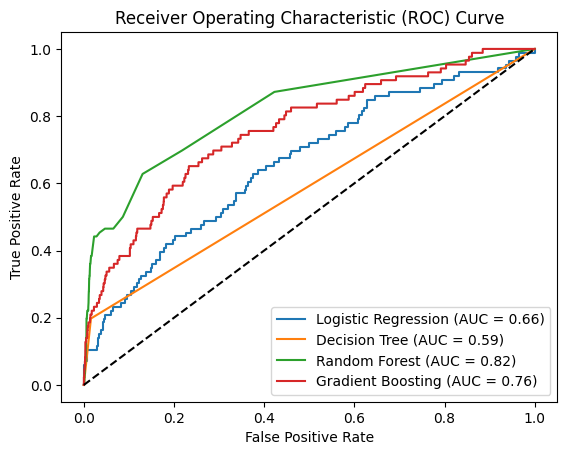


Best Model: Random Forest

Random Forest Test Results:
Test Accuracy: 0.9816
Test Precision: 0.3023
Test Recall: 0.1111
Test F1 Score: 0.1625
Test Confusion Matrix:
[[7145   30]
 [ 104   13]]
Test ROC AUC: 0.7818


['best_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# Load the preprocessed data
train_data_preprocessed = pd.read_csv('train_data_preprocessed.csv')
test_data_preprocessed = pd.read_csv('test_data_preprocessed.csv')

# Define the target column based on your dataset
target_column = 'Is high risk'  # Use the correct target column name here

# Define features and target variable
X_train = train_data_preprocessed.drop(target_column, axis=1)
y_train = train_data_preprocessed[target_column]
X_test = test_data_preprocessed.drop(target_column, axis=1)
y_test = test_data_preprocessed[target_column]

# Convert target variable to categorical if needed
if y_train.dtype == 'float64':  # Assuming continuous target needs conversion
    threshold = 0.5  # Define an appropriate threshold based on your data
    y_train = (y_train > threshold).astype(int)
    y_test = (y_test > threshold).astype(int)

# If target variable is categorical, convert to integer labels
if y_train.dtype == 'object':  # Assuming target variable is categorical text
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

# Train-test split for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train_split, y_train_split)

    # Predict on validation data
    y_pred = model.predict(X_val_split)
    y_prob = model.predict_proba(X_val_split)[:, 1]  # For ROC AUC

    # Evaluate the model
    accuracy = accuracy_score(y_val_split, y_pred)
    precision = precision_score(y_val_split, y_pred)
    recall = recall_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred)
    cm = confusion_matrix(y_val_split, y_pred)
    roc_auc = roc_auc_score(y_val_split, y_prob)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'ROC AUC': roc_auc
    }

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val_split, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Select the best model based on ROC AUC or other metrics
best_model_name = max(results, key=lambda k: results[k]['ROC AUC'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Re-train the best model on the full training data
best_model.fit(X_train, y_train)

# Predict on test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluate the best model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

print(f"\n{best_model_name} Test Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("Test Confusion Matrix:")
print(test_cm)
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Save the best model if needed
joblib.dump(best_model, 'best_model.pkl')


Test Accuracy: 0.9816
Test Precision: 0.3023
Test Recall: 0.1111
Test F1 Score: 0.1625
Test Confusion Matrix:
[[7145   30]
 [ 104   13]]
Test ROC AUC: 0.7818


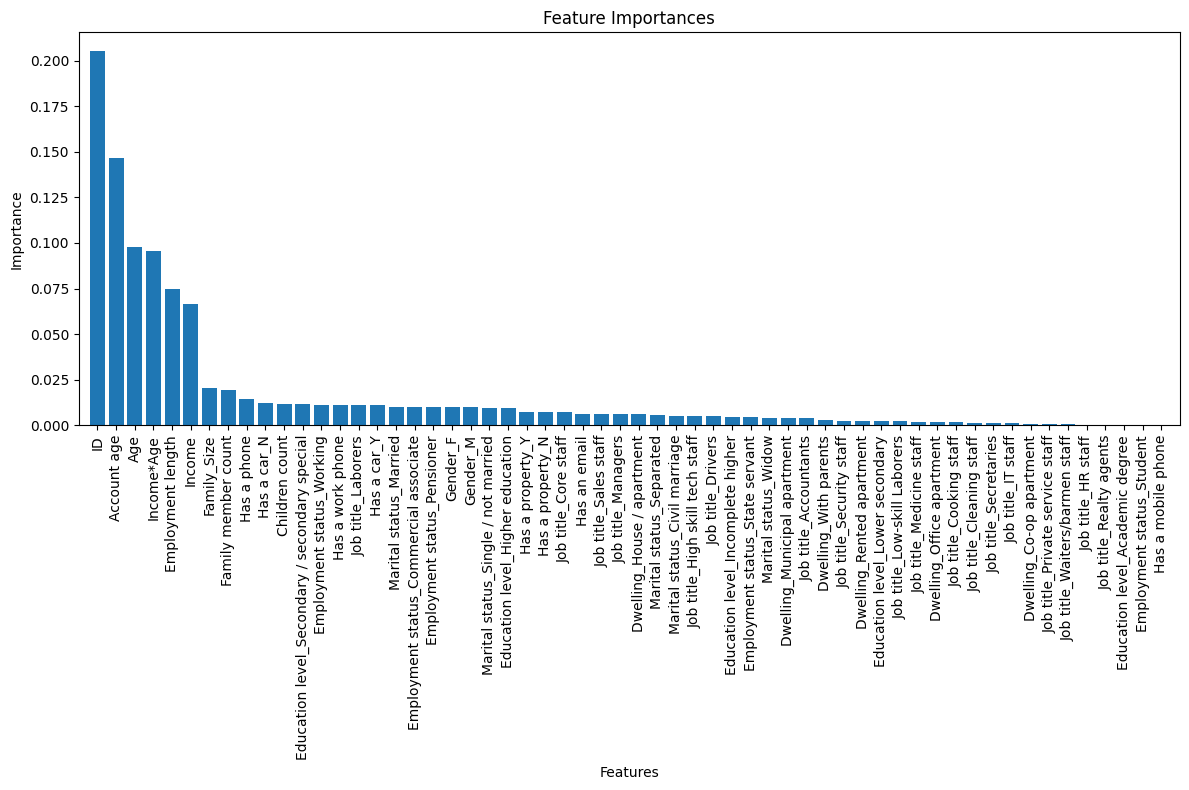

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Load the preprocessed test data
test_data_preprocessed = pd.read_csv('test_data_preprocessed.csv')

# Define the target column based on your dataset
target_column = 'Is high risk'  # Use the correct target column name here

# Define features and target variable
X_test = test_data_preprocessed.drop(target_column, axis=1)
y_test = test_data_preprocessed[target_column]

# Convert target variable to categorical if needed
if y_test.dtype == 'float64':  # Assuming continuous target needs conversion
    threshold = 0.5  # Define an appropriate threshold based on your data
    y_test = (y_test > threshold).astype(int)

# If target variable is categorical, convert to integer labels
if y_test.dtype == 'object':  # Assuming target variable is categorical text
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)

# Load the best model
best_model = joblib.load('best_model.pkl')

# Predict on the test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluate the best model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("Test Confusion Matrix:")
print(test_cm)
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Feature importance for models that support it (e.g., RandomForest, GradientBoosting)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    features = X_test.columns
    indices = np.argsort(importances)[::-1]

    # Create a figure with increased size for better readability
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')

    # Plot feature importances
    plt.bar(range(X_test.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_test.shape[1]), np.array(features)[indices], rotation=90, fontsize=10)

    # Adjust x-axis limits to fit all labels
    plt.xlim([-1, X_test.shape[1]])
    plt.xlabel('Features')
    plt.ylabel('Importance')

    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Predict credit card approval using new data (example)
# new_data = pd.DataFrame({...})  # Replace with your new data
# new_data_preprocessed = preprocessor.transform(new_data)
# new_predictions = best_model.predict(new_data_preprocessed)
# new_probabilities = best_model.predict_proba(new_data_preprocessed)[:, 1]
